<div style="border:3px solid black; padding:20px; background-color:mistyrose; text-align:center; border-radius:12px;">
  <h1 style="color:darkred;">🌳 Decision Tree Classifier Project</h1>
  <p style="font-size:18px; color:darkblue;">Supervised Learning for Classification with Scikit-Learn</p>
</div>


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
#importing the data
df=pd.read_csv(r"C:\Users\92331\Desktop\ML\DECISION_TREE\car_evaluation.csv")

<div style="border:2px solid black; padding:15px; background-color:mistyrose; text-align:center; border-radius:10px;">
  <h1 style="color:darkred;">📊 Exploratory Data Analysis (EDA)</h1>
  <p style="font-size:16px; color:darkblue;">Uncovering patterns, relationships, and data quality insights</p>
</div>


In [4]:
df.head(10)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [5]:
#renaming columns
column_name=['buying','maintanence','doors','persons','lug_boot','safety','class']
df.columns=column_name
df.columns

Index(['buying', 'maintanence', 'doors', 'persons', 'lug_boot', 'safety',
       'class'],
      dtype='object')

In [6]:
df.shape

(1727, 7)

In [7]:
df.describe()

,buying,maintanence,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintanence  1727 non-null   object
 2   doors        1727 non-null   object
 3   persons      1727 non-null   object
 4   lug_boot     1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
for col in column_name:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maintanence
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


<div style="border:2px solid black; padding:15px; background-color:mistyrose; text-align:center; border-radius:10px;">
  <h1 style="color:darkred;">⚙️ Model Development</h1>
  <p style="font-size:16px; color:darkblue;">Training, validation, and optimization of the predictive pipeline</p>
</div>


In [10]:
X=df.drop("class",axis=1)
y=df["class"]

#
num_columns=[]
cat_columns=df.drop("class",axis=1).columns

num_pipelien=Pipeline([("imputer",SimpleImputer(strategy="median")),("scaler",StandardScaler())])
cat_pipeline=Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

preprocessing=ColumnTransformer([("num",num_pipelien,num_columns),("cat",cat_pipeline,cat_columns)])
Pipe=Pipeline([("preprocess",preprocessing),("model",DecisionTreeClassifier(random_state=42))])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

Pipe.fit(X_train,y_train)







,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


<div style="border:2px solid black; padding:15px; background-color:mistyrose; text-align:center; border-radius:10px;">
  <h1 style="color:darkred;">✅ Model Evaluation & Validation</h1>
  <p style="font-size:16px; color:darkblue;">Assessing performance using accuracy, precision, recall, F1-score, and ROC-AUC</p>
</div>


In [11]:
y_pred=Pipe.predict(X_test)
print(f"Confusion matrix /n",confusion_matrix(y_test,y_pred))

print(f"\nclassification report/n",classification_report(y_test,y_pred))

Confusion matrix /n [[ 70   2   5   0]
 [  0  14   0   0]
 [  1   0 241   0]
 [  0   0   0  13]]

classification report/n               precision    recall  f1-score   support

         acc       0.99      0.91      0.95        77
        good       0.88      1.00      0.93        14
       unacc       0.98      1.00      0.99       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.96      0.98      0.97       346
weighted avg       0.98      0.98      0.98       346



<div style="border:2px solid black; padding:15px; background-color:mistyrose; text-align:center; border-radius:10px;">
  <h1 style="color:darkred;">✅ Model Pruning</h1>
  <p style="font-size:16px; color:darkblue;">Assessing performance using accuracy, precision, recall, F1-score, and ROC-AUC</p>
</div>


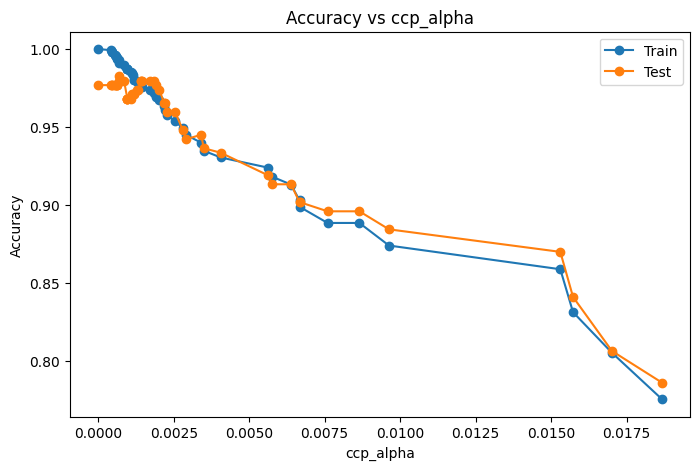

BEST VALUE FOR ALPHA  0.0006815180815266007


In [23]:
#pruning / CCP(cost-complexity-pruning)
#ccp_path give all possible ccp_alpha values(the penalty)
ccp_path=DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(preprocessing.fit_transform(X_train),y_train)
ccp_alphas=ccp_path.ccp_alphas[:-1]

#Training each tree for each alpha value 
train_score, test_score = [], []
for alpha in ccp_alphas:
    model=Pipeline([("preprocessing",preprocessing),("clf",DecisionTreeClassifier(random_state=42,ccp_alpha=alpha))])
    model.fit(X_train,y_train)
    train_score.append(model.score(X_train,y_train))
    test_score.append(model.score(X_test,y_test))

#visualisation
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_score, marker="o", label="Train")
plt.plot(ccp_alphas, test_score, marker="o", label="Test")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs ccp_alpha")
plt.legend()
plt.show()

#to get best value of alpha automatically

best_alpha=ccp_alphas[np.argmax(test_score)]
print(f"BEST VALUE FOR ALPHA ",best_alpha)




In [ ]:
#Testing it in our final model
final_model=Pipeline([("preprocessing",preprocessing),("clf",DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha))])
final_model.fit(X_train,y_train)
final_model.predict(X_test)
print(f"final models test score",final_model.score(X_train,y_train))
print(f"final models test score ",final_model.score(X_test,y_test))

final models test score 0.9927588703837799
final models test score  0.9826589595375722
